In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot , style
style.use('dark_background')
import seaborn as sns
from Functions import General ,PlotFunctions , DataAcquisition


In [2]:
def get_data(name='SNP500 Stocks - 50'):
    from sqlalchemy import create_engine , event
    cred = {x.split(':')[0]: x.split(':')[1] for x in open(r'c:\data\sqlcred\mysql.txt','r').read().splitlines()}

    user = cred['user']
    passw =cred['pass']
    host = cred['server']
    db =  cred['db']
    constr= 'mysql+mysqlconnector://{USER}:{PASS}@{HOST}/{DB}'.format(USER=user,
                                                                        PASS=passw,
                                                                        HOST=host,
                                                                        DB=db)

    engine = create_engine(constr)        

    df = pd.read_sql(name,con=engine)
    return df
    



In [18]:
%matplotlib inline

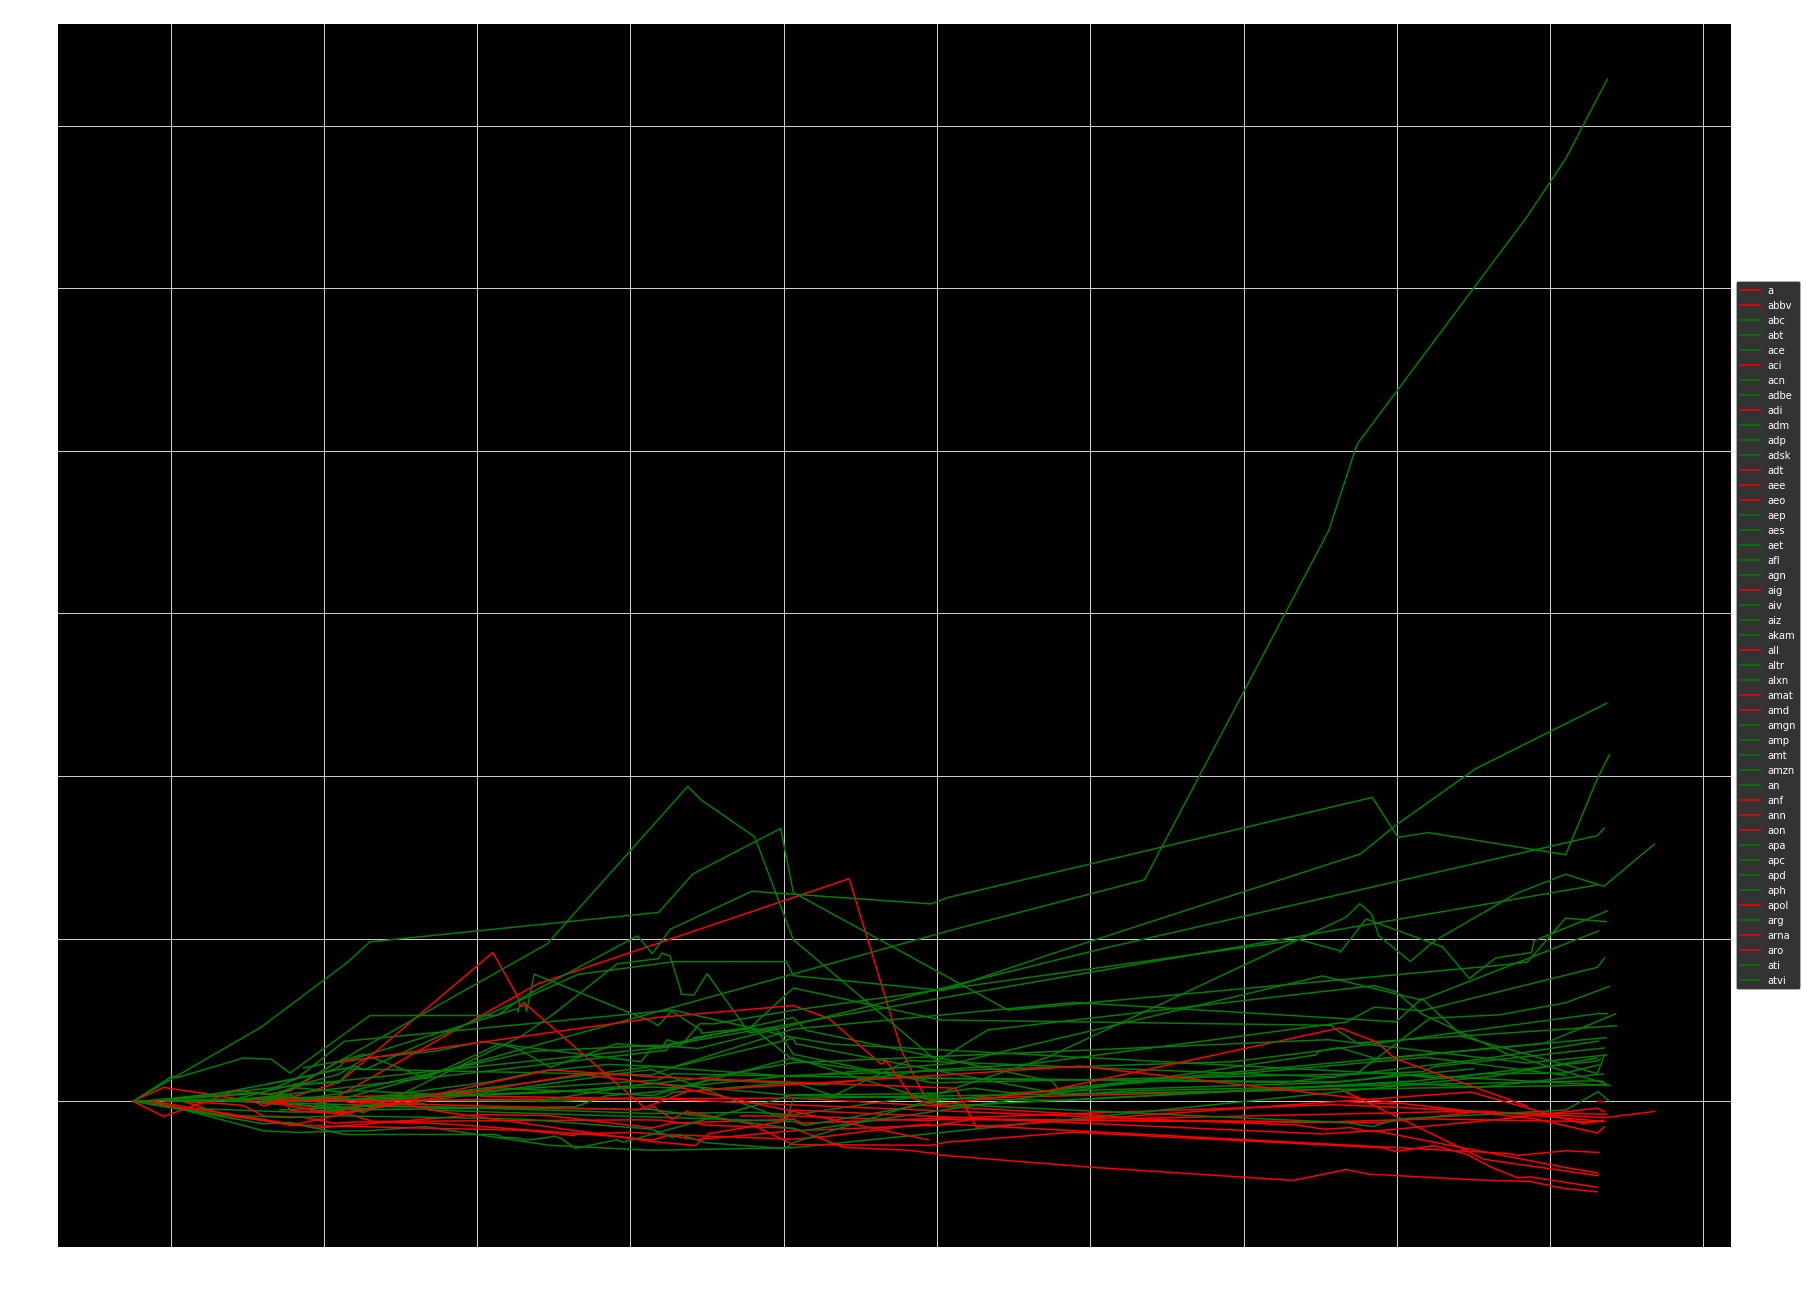

In [19]:
df = get_data()
PlotFunctions.plot_df(df.loc[df.Ticker!='aapl'],figsize=(30,25))
df = df[df > -100.]
df = df[df.Absolute_Stock_Perfomance<200]
vdf = df[['Profit Margin ttm',
       'Total Debt/Equity mrq', 'Price/Book mrq', 'Return on Assets ttm',
        'Absolute_SNP500_Perfomance',
       'YtY_Stock_Price_Value_Change', 'YtY_SNP500_Value_Change',
       'Absolute_Stock_Perfomance', 'Absolute_Stock_Perfomance_Flag',
       'YtY_Stock_Perfomance', 'YtY_Stock_Perfomance_Flag']]
#ax = df.plot('Age','Fare',kind='scatter',c='Survived',colormap=cm.Dark2_r,s=df['Fare'],figsize=(15,8),sharex=False)

C:\Users\ervik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\ervik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


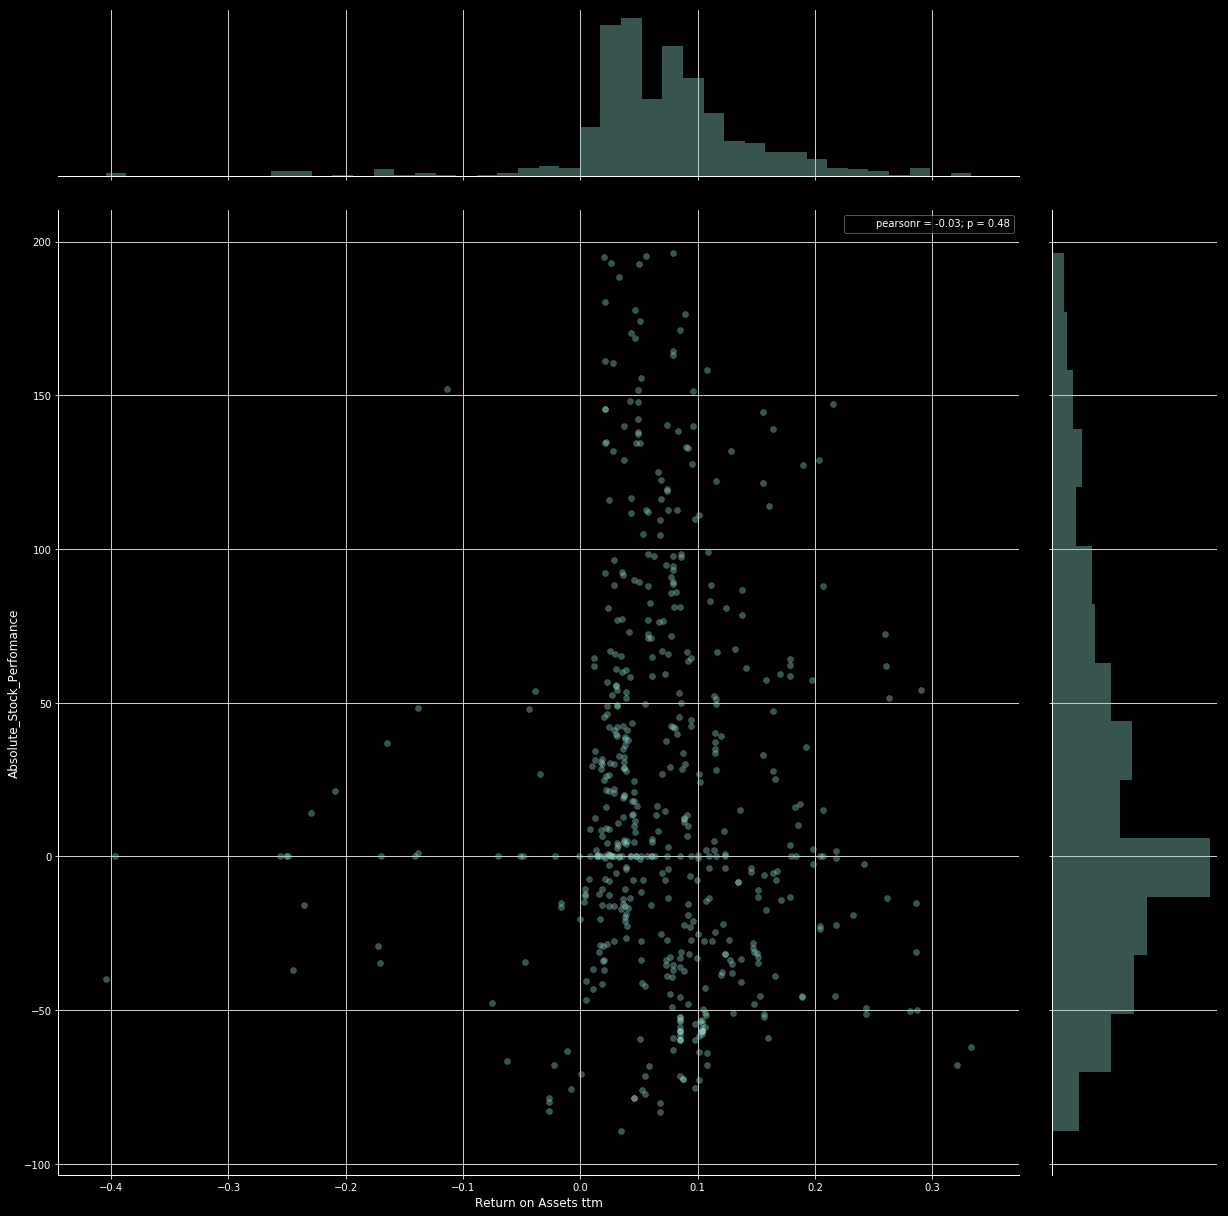

In [13]:
sns.jointplot(vdf['Return on Assets ttm'],vdf['Absolute_Stock_Perfomance'],alpha=0.4,size=17);

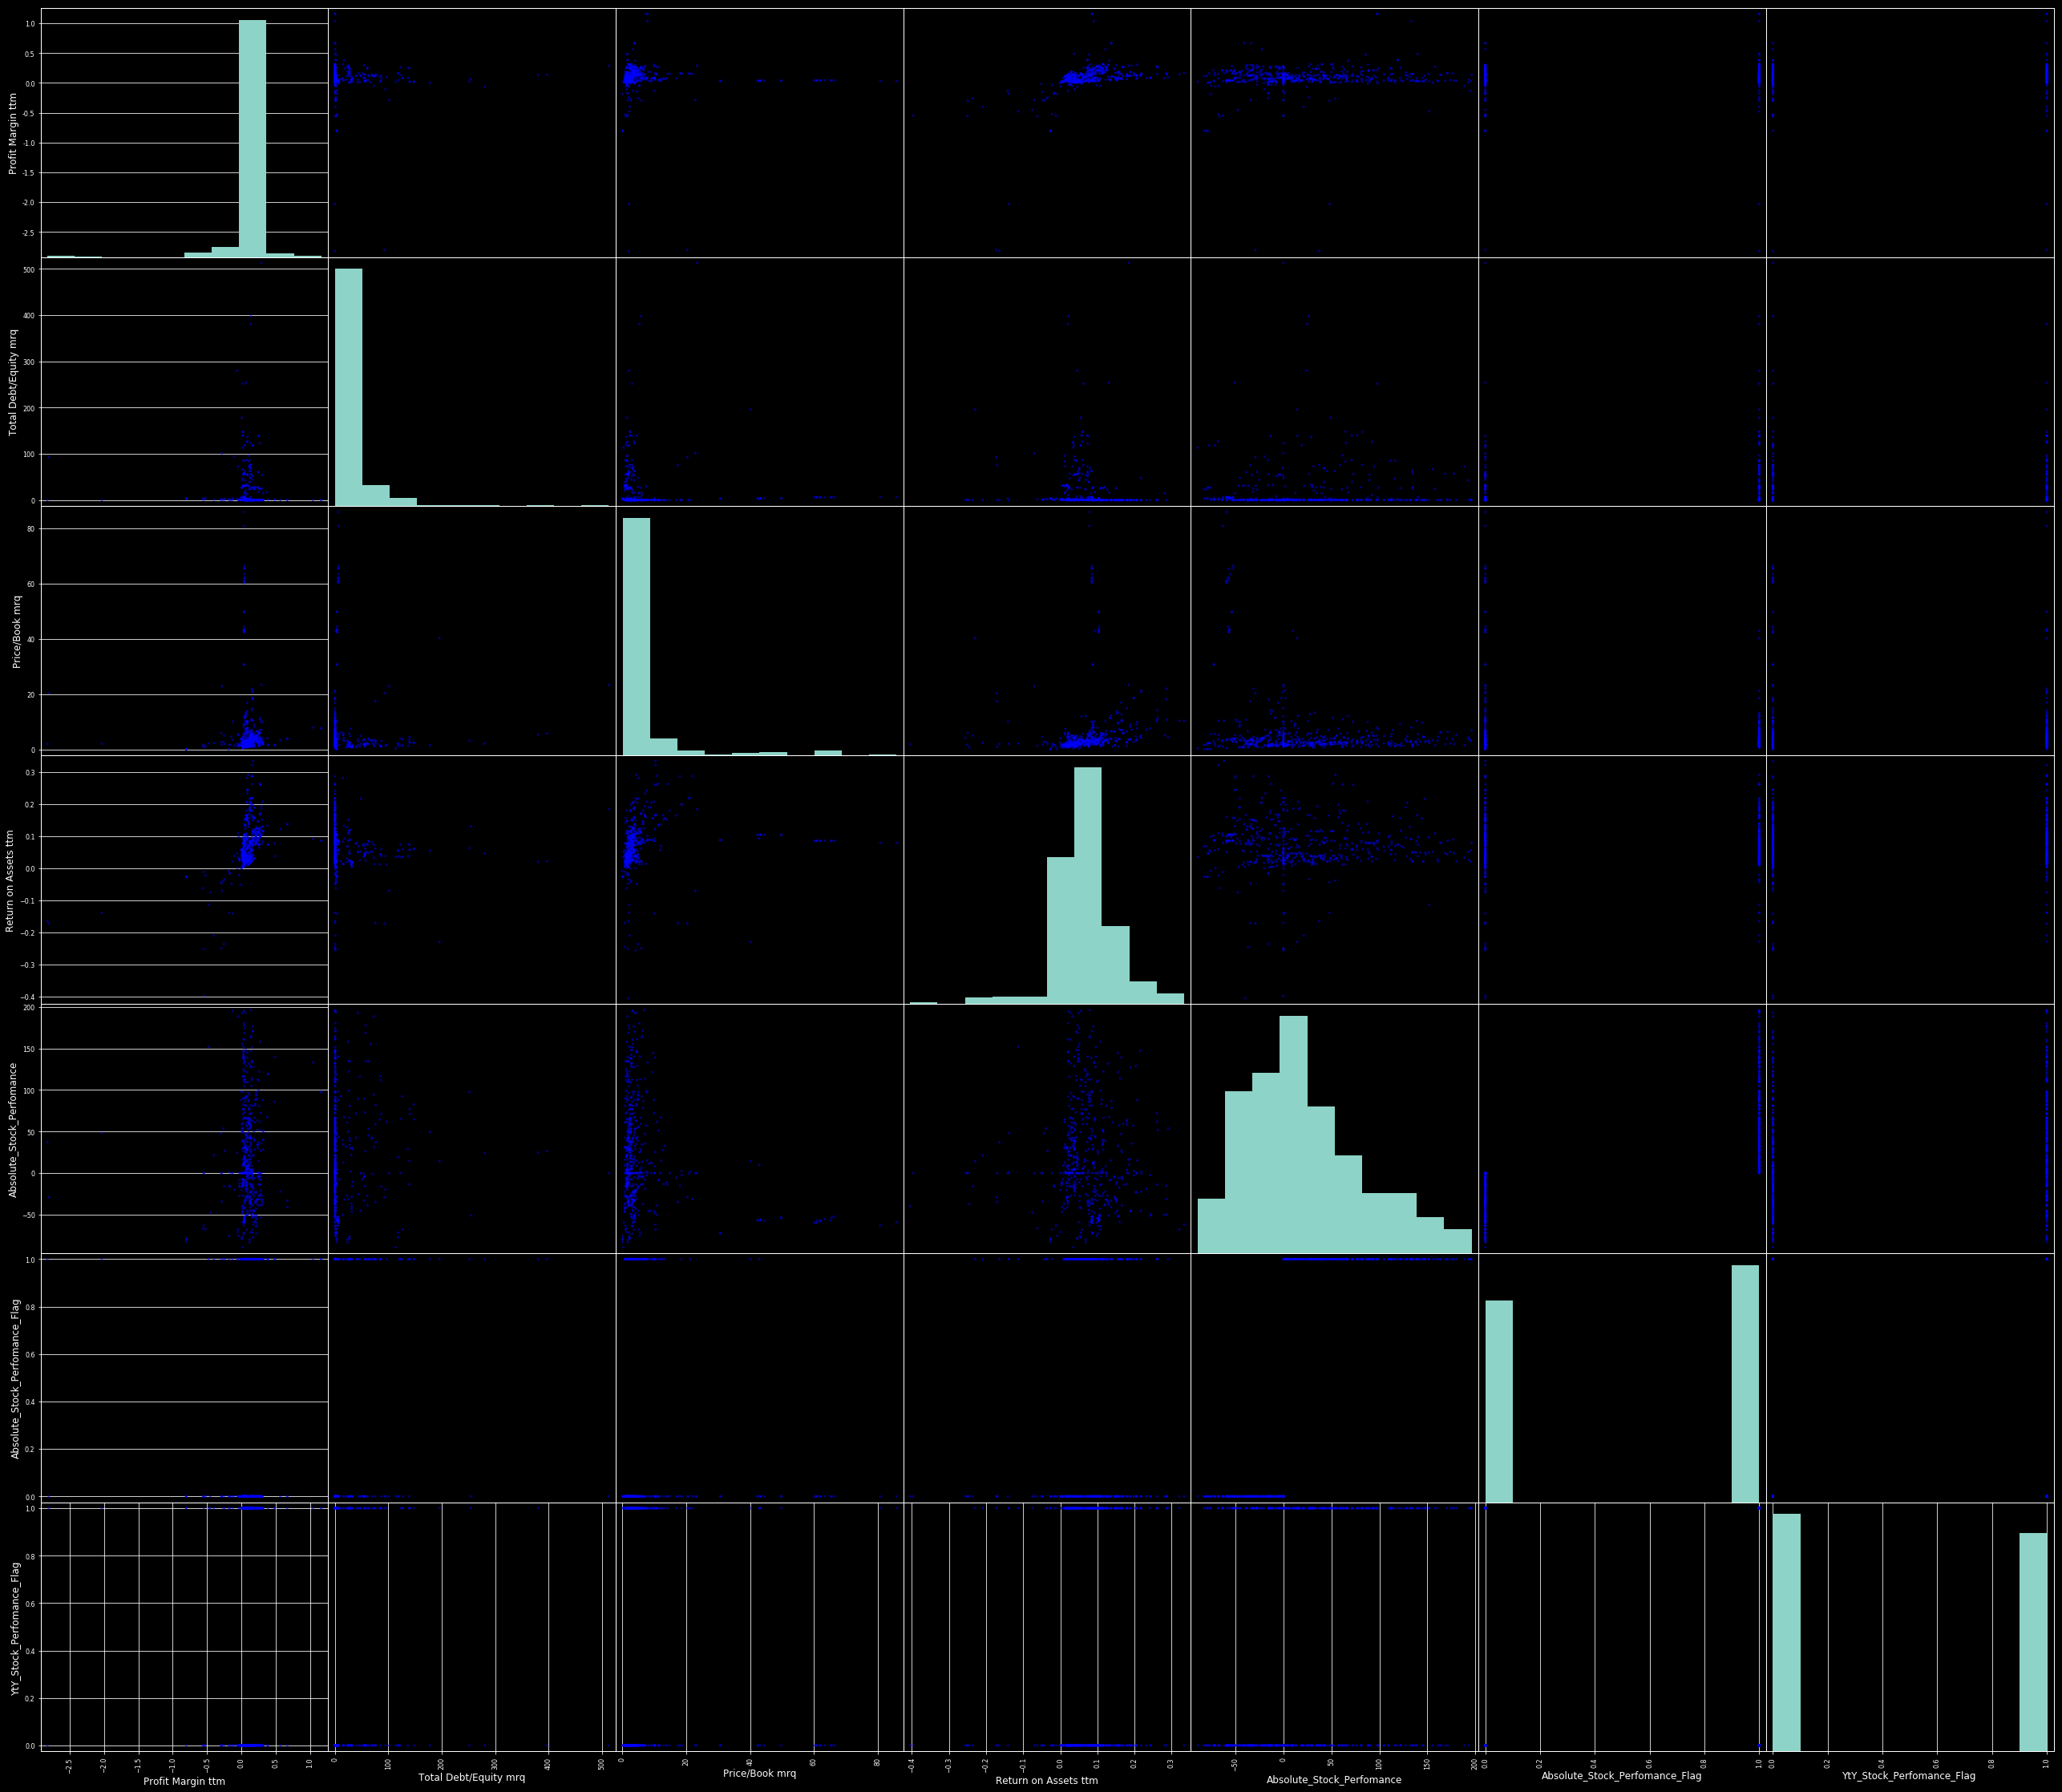

In [14]:
pd.plotting.scatter_matrix(vdf,figsize=(45,40),c='blue');

In [ ]:
#sns.pairplot(vdf, hue='Absolute_Stock_Perfomance_Flag', size=10);

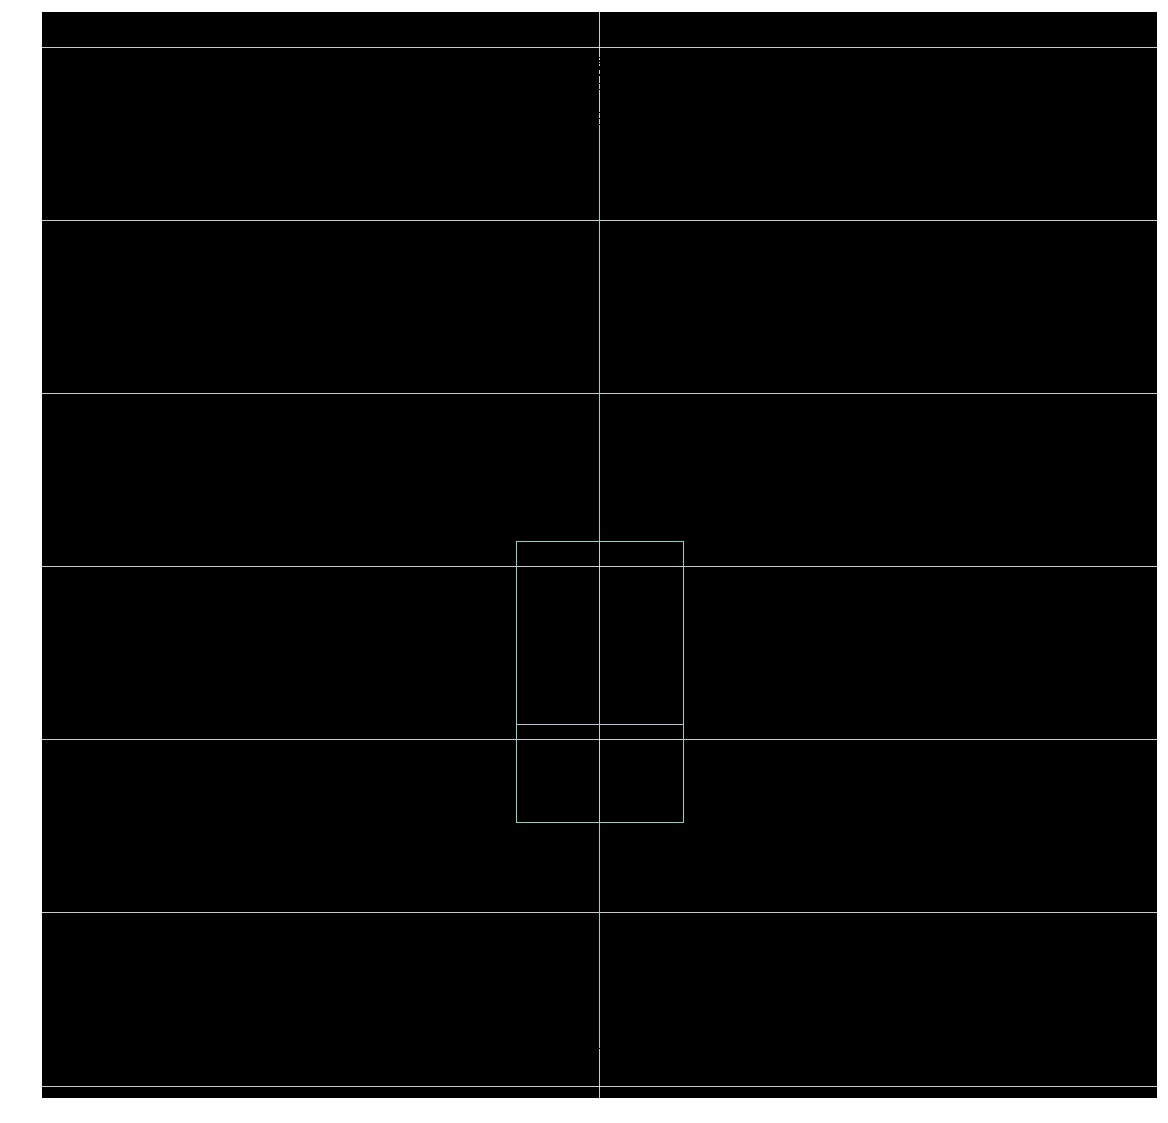

In [21]:
ax= vdf[['Absolute_Stock_Perfomance','YtY_Stock_Price_Value_Change']].plot.box(figsize=(20,20))

In [3]:
def get_features(features=[
                           'Total Debt/Equity mrq',
                          'Price/Book mrq'],dropna=True):
    df = get_data()
    if dropna:
        df.replace({-99999.00:None},inplace=True)
        df.dropna(how='any',inplace=True)
    y = np.array(df['Absolute_Stock_Perfomance_Flag'])
    df = df[features]
    X = np.array(df.values)
    sscaller = StandardScaler()
    X = sscaller.fit_transform(X)
    return X, y


In [4]:
X,y = get_features()
clf = svm.SVC(kernel='linear',C=1.0)
clf.fit(X,y)

C:\Users\ervik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ervik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

No handles with labels found to put in legend.


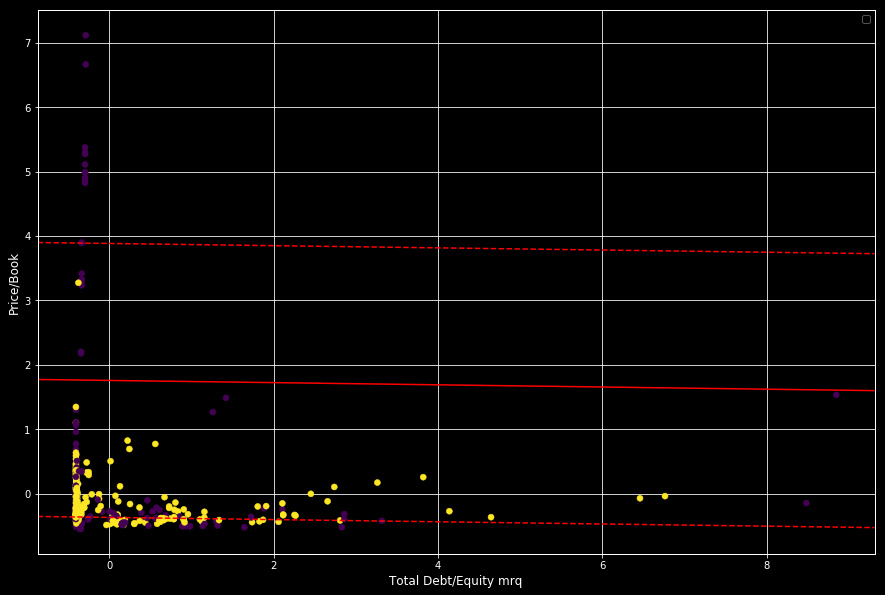

In [128]:

pyplot.figure(figsize=(15,10))

pyplot.scatter(X[:,0],X[:,1],c=y,)
pyplot.ylabel('Price/Book')
pyplot.xlabel('Total Debt/Equity mrq')
pyplot.legend()

#pyplot.xlim(xmax=200)
#pyplot.ylim(ymax=40)
ax = pyplot.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)


ax.contour(XX, YY, Z, colors='r', levels=[-1, 0, 1], alpha=1,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
pyplot.show()